------------------------------------Kannada_MNIST - Classification Problem--------------------------------------------

Importing Necessary Libraries

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score,precision_score, f1_score, recall_score, roc_auc_score,confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import seaborn as sns

Loading the Dataset

In [11]:

X_train = np.load('X_kannada_MNIST_train.npz')['arr_0']
y_train = np.load('y_kannada_MNIST_train.npz')['arr_0']
X_test = np.load('X_kannada_MNIST_test.npz')['arr_0']
y_test = np.load('y_kannada_MNIST_test.npz')['arr_0']

In [12]:
#Checking for Shape of the Dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [13]:
#Reshaping  2D data into 1D data
X_train_reshape = X_train.reshape(X_train.shape[0], 784)
X_test_reshape = X_test.reshape(X_test.shape[0], 784)
#--------------------------------------------------------------------------------------------------------------------
print(X_train_reshape.shape)
print(X_test_reshape.shape)

(60000, 784)
(10000, 784)


Converting Dataset into Pandas Dataframe

In [14]:
X_train = pd.DataFrame(X_train_reshape)
X_test = pd.DataFrame(X_test_reshape)
y_train = pd.DataFrame(y_train,columns=['target'])
y_test = pd.DataFrame(y_test,columns=['target'])

Image of Different Classes

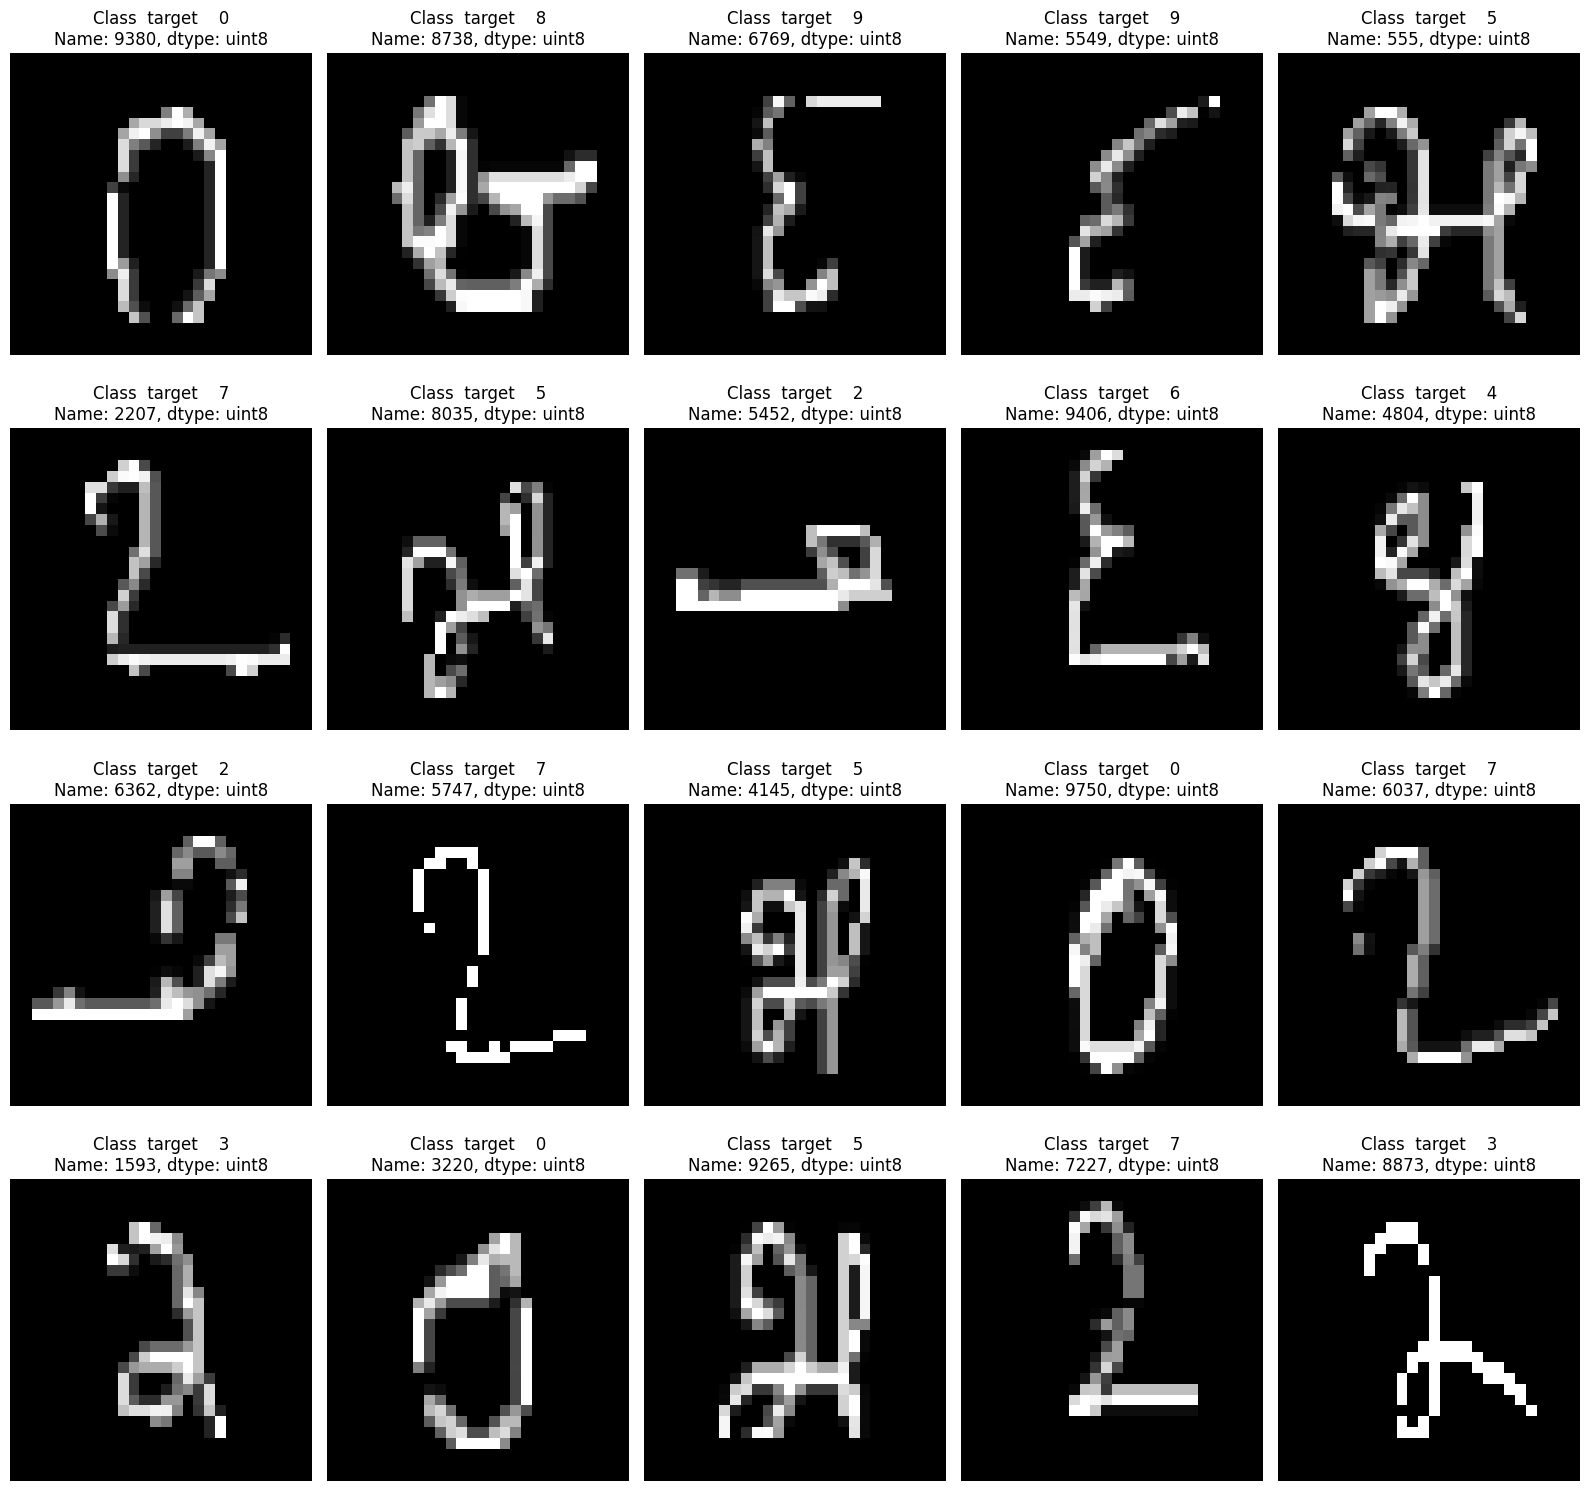

In [15]:
#Visual representation of classes with corresponding images
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,10000,20):
    plt.subplot(4,5,j)
    j=j+1
    plt.imshow(X_train.iloc[i, :].values.reshape(28, 28),cmap="gray") #Reshaping it into  28x28 image
    plt.axis("off")
    plt.title(f"Class  {y_train.iloc[i]}")
    plt.tight_layout()
plt.show()    

In [16]:

# pca = PCA(n_components=30)
# pca.fit(X_train)
# x_train = pca.fit(X_train)
# x_test = pca.transform(X_test)

# mm = MinMaxScaler()
# mm.fit(X_train)
# x_train = mm.transform(X_train)
# x_test = mm.transform(X_test)


# model=DecisionTreeClassifier(random_state=42)
# model.fit(x_train, y_train)
# y_pred = model.predict(x_test)
# accuracy         =     accuracy_score(y_test, y_pred)
# accuracy 


Accuracy Score list for Plotting the Graph

In [17]:
component_size=[30,25,20,15,10]
#Models with accuracy for different component size
accuracy_list_dt=[]
accuracy_list_rf=[]
accuracy_list_nb=[]
accuracy_list_knn=[]
accuracy_list_svc=[]
accuracy_list=[accuracy_list_dt,accuracy_list_rf,accuracy_list_nb,accuracy_list_knn,accuracy_list_svc]
# accuracy_list=[accuracy_list_dt,accuracy_list_knn]

ROC_AUC_Score List for Plotting the Graph

In [18]:
#ROC_AUC Curve
roc_auc_dt=[]
roc_auc_rf=[]
roc_auc_nb=[]
roc_auc_knn=[]
roc_auc_svc=[]
roc_auc_list=[roc_auc_dt,roc_auc_rf,roc_auc_nb,roc_auc_knn,roc_auc_svc]
def prediction_probability(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)
    return y_pred_prob

Principle Component Analysis(PCA)for Dimensionality Reduction and Model Execution

-------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                             COMPONENT SIZE=30                                                                     
-------------------------------------------------------------------------------------------------------------------------------------------------------------

----------DECISION TREE CLASSIFIER----------

Decision Tree Accuracy: 0.8023
Decision Tree Precision: 0.8014369761993573
Decision Tree F1-score: 0.8009770397900959
Decision Tree Recall: 0.8023
Decision Tree ROC-AUC: 0.8901666666666668
Decision Tree Confusion Matrix:
[[826  75   6  30   5   3   7  11  24  13]
 [ 24 921   6   9   6  10   4   3   7  10]
 [  6   2 930  15   6  21   4   7   1   8]
 [ 14   3  16 752  42  48  24  80   5  16]
 [  3   2   3  57 762  74   8  22  16  53]
 [  9   8  11  42 122 695  12  24  25  52]
 [  3   7 

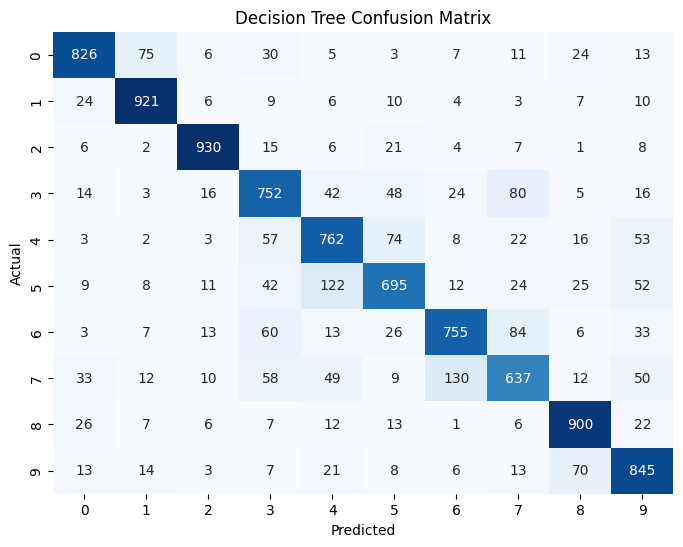

c:\Users\banup\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



----------RANDOM FOREST CLASSIFIER----------

Random Forest Accuracy: 0.9247
Random Forest Precision: 0.9264188406229612
Random Forest F1-score: 0.9244616870767401
Random Forest Recall: 0.9247
Random Forest ROC-AUC: 0.9948856944444444
Random Forest Confusion Matrix:
[[876  97   0  11   4   0   1   1   8   2]
 [ 11 967   0   8   4   1   0   0   3   6]
 [  5   0 980   2   1   9   1   0   2   0]
 [ 12   3   3 929   6  24   2  21   0   0]
 [  1   0   0  14 961  16   0   2   5   1]
 [  0   1   0  18 112 860   1   3   1   4]
 [  0   2   0  16  14  21 916   8   0  23]
 [ 18   2   0  26  25   5  67 838   1  18]
 [  8   2   0   1   2   9   0   0 975   3]
 [  1   2   0   0   3   0   6   3  40 945]]


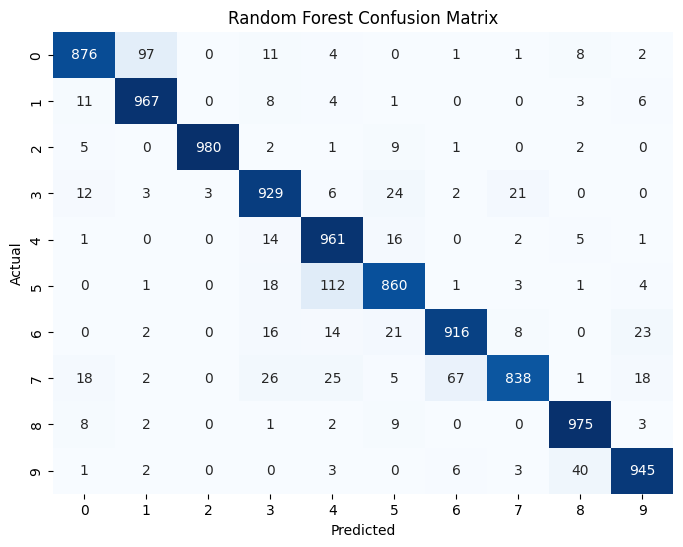

c:\Users\banup\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



----------NAIVE BAYES CLASSIFIER----------

Naive Bayes Accuracy: 0.6258
Random Forest Precision: 0.7454234197966514
Naive Bayes F1-score: 0.6248144529573578
Naive Bayes Recall: 0.6257999999999999
Naive Bayes ROC-AUC: 0.9109404222222223
Naive Bayes Confusion Matrix:
[[378 115   3 102 384   8   0   0  10   0]
 [ 22 598   1  83 260  24   0   0   2  10]
 [  5   0 987   0   1   6   0   0   1   0]
 [  4   1   4 576 359  21  22  13   0   0]
 [  1   0   6  17 910  17   5   0  34  10]
 [  7   0   1 129 378 468   0   5   5   7]
 [  2   1   8  35  45   0 874  18  14   3]
 [  2   2   1 285 228  13 353 110   3   3]
 [ 31   0   0   1 126  13   0   0 802  27]
 [  2   2   0   3 395   1   0   0  42 555]]


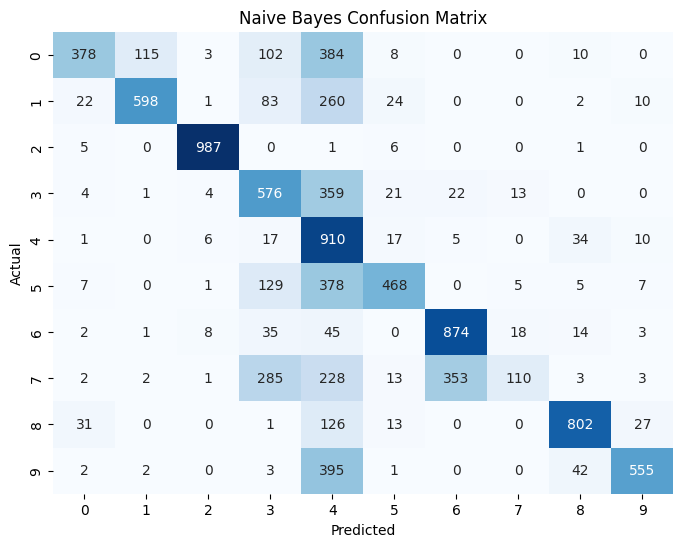

c:\Users\banup\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



----------K NEIGHBORS CLASSIFIER----------

KNN Accuracy: 0.9166
KNN Precision: 0.921741887468991
KNN F1-score: 0.9163591670502814
KNN Recall: 0.9166000000000001
KNN ROC-AUC: 0.9855020388888889
KNN Confusion Matrix:
[[845 139   0   8   2   0   0   1   1   4]
 [  9 981   0   5   2   0   0   0   1   2]
 [  3   2 990   2   1   0   1   0   0   1]
 [ 12  10   1 945  10   5   1  16   0   0]
 [  0   0   0   6 982   1   3   4   0   4]
 [  0   9   5  19 145 801   5   4   6   6]
 [  4   2   2   7  24   5 919  19   0  18]
 [ 11   4   0  24  24   0 104 825   0   8]
 [ 49   8   1   4   1   0   1   0 934   2]
 [  5  11   0   0   8   0   8   5  19 944]]


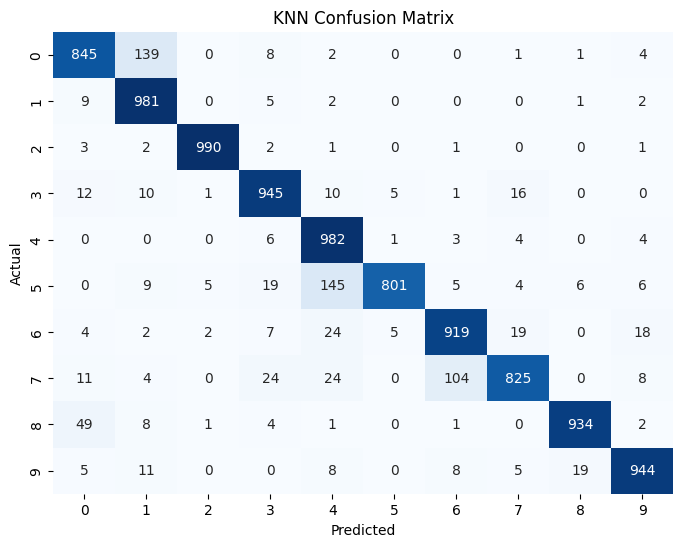

c:\Users\banup\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



----------SUPPORT VECTOR CLASSIFIER----------

SVC Accuracy: 0.9453
SVC F1-score: 0.9450524561187656
SVC Recall: 0.9452999999999999
SVC ROC-AUC: 0.9974878333333332
SVC_confusion_matrix :
[[878 101   0   7   2   0   0   1   8   3]
 [  8 972   0   9   2   1   0   0   3   5]
 [  2   0 993   1   1   1   0   0   1   1]
 [  4   5   4 940  11  13   2  21   0   0]
 [  1   0   0   4 979   6   3   2   3   2]
 [  0   0   1   4  70 919   1   3   2   0]
 [  1   0   0   8  12   5 951   6   0  17]
 [ 18   2   0  19  15   1  78 859   1   7]
 [  5   1   0   0   1   3   0   0 987   3]
 [  7   2   0   0   2   0   2   1  11 975]]


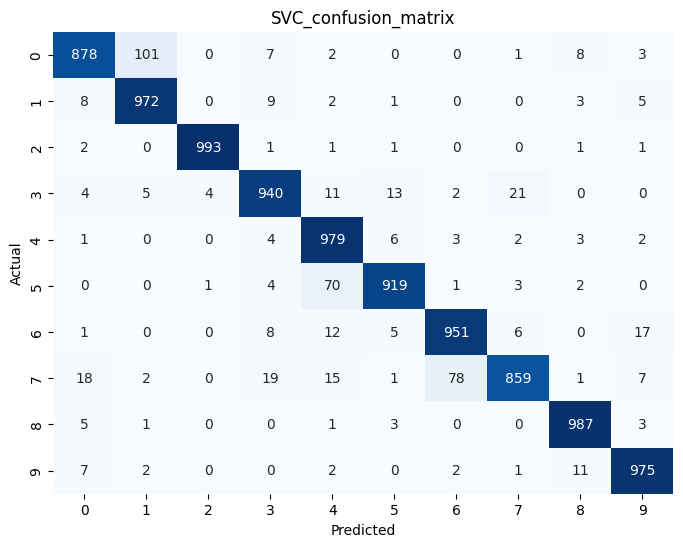

-------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                             COMPONENT SIZE=25                                                                     
-------------------------------------------------------------------------------------------------------------------------------------------------------------

----------DECISION TREE CLASSIFIER----------

Decision Tree Accuracy: 0.8012
Decision Tree Precision: 0.8005945172845564
Decision Tree F1-score: 0.7999760601865609
Decision Tree Recall: 0.8011999999999999
Decision Tree ROC-AUC: 0.8895555555555555
Decision Tree Confusion Matrix:
[[818  76  12  27   6   1   9   7  33  11]
 [ 37 910   7   8   9  10   2   2   9   6]
 [  4   4 930  10   8  24   4   7   3   6]
 [ 13   6  10 757  49  46  28  72   4  15]
 [  4   2   5  49 771  75   6  24  22  42]
 [  6   9  12  40 123 698   9  29  28  46

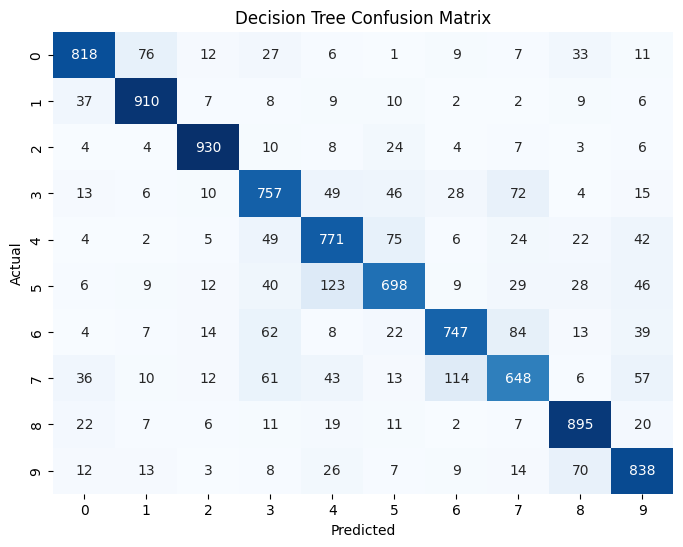

c:\Users\banup\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



----------RANDOM FOREST CLASSIFIER----------

Random Forest Accuracy: 0.9244
Random Forest Precision: 0.9263712479837307
Random Forest F1-score: 0.9241760381265737
Random Forest Recall: 0.9244
Random Forest ROC-AUC: 0.9949708833333334
Random Forest Confusion Matrix:
[[875  99   0  12   3   0   1   1   7   2]
 [ 10 965   0  11   5   3   1   0   2   3]
 [  5   0 981   2   2   8   1   0   1   0]
 [ 10   3   2 929   7  21   3  25   0   0]
 [  0   0   0   9 968  14   0   2   6   1]
 [  0   0   0  14 115 865   2   1   3   0]
 [  1   2   1  24  14  20 911   8   0  19]
 [ 18   3   0  28  28   5  69 834   1  14]
 [ 10   2   0   0   1   7   0   0 977   3]
 [  2   1   0   0   2   0   7   3  46 939]]


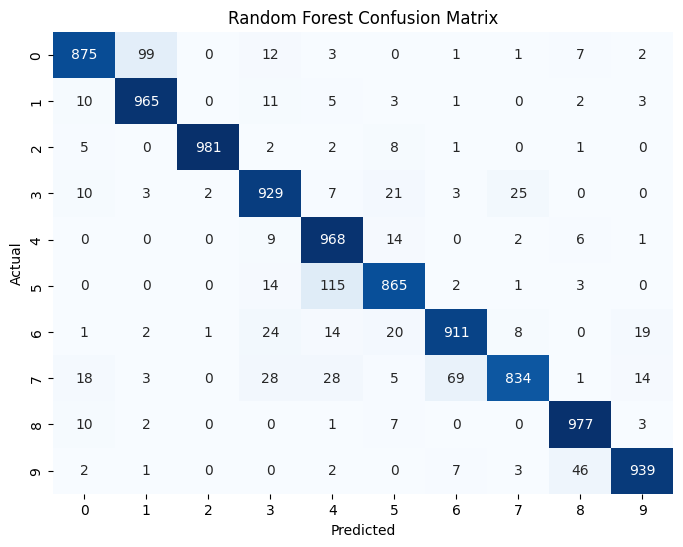

c:\Users\banup\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



----------NAIVE BAYES CLASSIFIER----------

Naive Bayes Accuracy: 0.6258
Random Forest Precision: 0.7454234197966514
Naive Bayes F1-score: 0.6248144529573578
Naive Bayes Recall: 0.6257999999999999
Naive Bayes ROC-AUC: 0.9109404222222223
Naive Bayes Confusion Matrix:
[[378 115   3 102 384   8   0   0  10   0]
 [ 22 598   1  83 260  24   0   0   2  10]
 [  5   0 987   0   1   6   0   0   1   0]
 [  4   1   4 576 359  21  22  13   0   0]
 [  1   0   6  17 910  17   5   0  34  10]
 [  7   0   1 129 378 468   0   5   5   7]
 [  2   1   8  35  45   0 874  18  14   3]
 [  2   2   1 285 228  13 353 110   3   3]
 [ 31   0   0   1 126  13   0   0 802  27]
 [  2   2   0   3 395   1   0   0  42 555]]


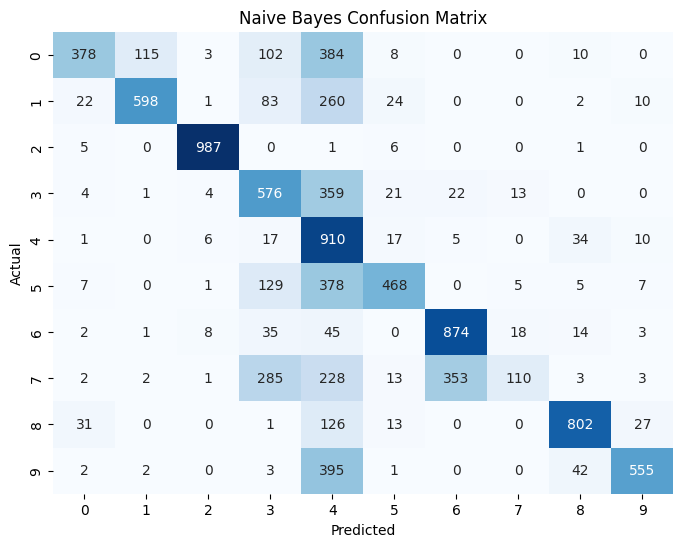

c:\Users\banup\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



----------K NEIGHBORS CLASSIFIER----------

KNN Accuracy: 0.9166
KNN Precision: 0.921741887468991
KNN F1-score: 0.9163591670502814
KNN Recall: 0.9166000000000001
KNN ROC-AUC: 0.9855020388888889
KNN Confusion Matrix:
[[845 139   0   8   2   0   0   1   1   4]
 [  9 981   0   5   2   0   0   0   1   2]
 [  3   2 990   2   1   0   1   0   0   1]
 [ 12  10   1 945  10   5   1  16   0   0]
 [  0   0   0   6 982   1   3   4   0   4]
 [  0   9   5  19 145 801   5   4   6   6]
 [  4   2   2   7  24   5 919  19   0  18]
 [ 11   4   0  24  24   0 104 825   0   8]
 [ 49   8   1   4   1   0   1   0 934   2]
 [  5  11   0   0   8   0   8   5  19 944]]


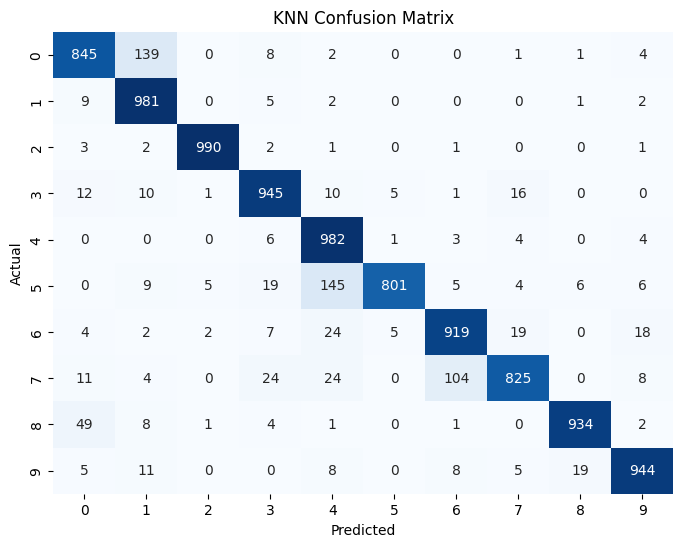

c:\Users\banup\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



----------SUPPORT VECTOR CLASSIFIER----------

SVC Accuracy: 0.9453
SVC F1-score: 0.9450524561187656
SVC Recall: 0.9452999999999999
SVC ROC-AUC: 0.9974829111111111
SVC_confusion_matrix :
[[878 101   0   7   2   0   0   1   8   3]
 [  8 972   0   9   2   1   0   0   3   5]
 [  2   0 993   1   1   1   0   0   1   1]
 [  4   5   4 940  11  13   2  21   0   0]
 [  1   0   0   4 979   6   3   2   3   2]
 [  0   0   1   4  70 919   1   3   2   0]
 [  1   0   0   8  12   5 951   6   0  17]
 [ 18   2   0  19  15   1  78 859   1   7]
 [  5   1   0   0   1   3   0   0 987   3]
 [  7   2   0   0   2   0   2   1  11 975]]


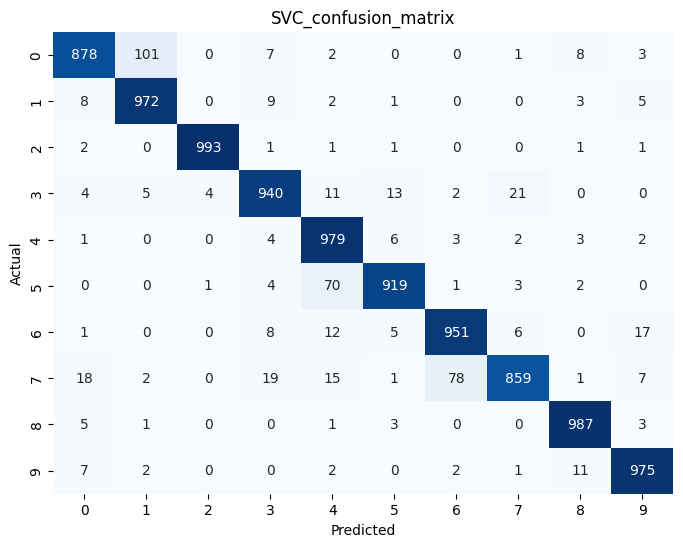

-------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                             COMPONENT SIZE=20                                                                     
-------------------------------------------------------------------------------------------------------------------------------------------------------------

----------DECISION TREE CLASSIFIER----------

Decision Tree Accuracy: 0.8027
Decision Tree Precision: 0.8016771821190606
Decision Tree F1-score: 0.8015152784295093
Decision Tree Recall: 0.8027000000000001
Decision Tree ROC-AUC: 0.890388888888889
Decision Tree Confusion Matrix:
[[815  81  11  26   7   2   5  12  29  12]
 [ 41 909   4  10   7   9   4   2   6   8]
 [  8   2 929  11   3  29   5   5   2   6]
 [ 10   3  14 760  42  45  31  72   6  17]
 [  7   2   7  53 755  79   9  31  17  40]
 [  8  10   6  34 120 717  10  28  25  42]

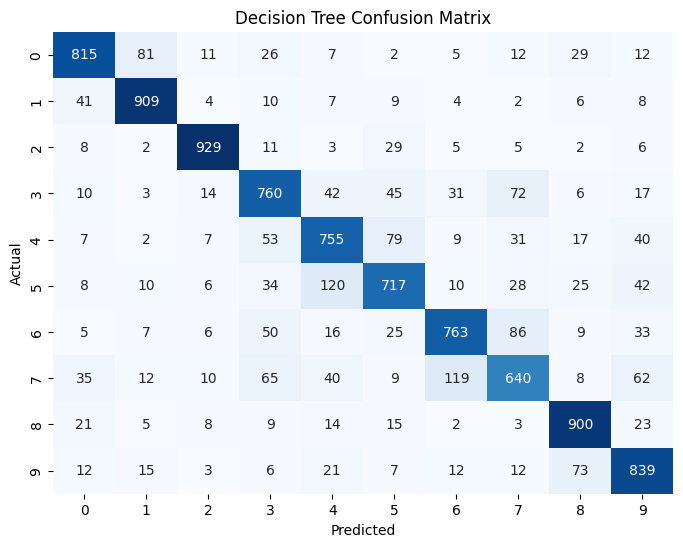

c:\Users\banup\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



----------RANDOM FOREST CLASSIFIER----------

Random Forest Accuracy: 0.924
Random Forest Precision: 0.9257980097623889
Random Forest F1-score: 0.923690425596605
Random Forest Recall: 0.9239999999999998
Random Forest ROC-AUC: 0.9947411333333334
Random Forest Confusion Matrix:
[[875 100   1  14   3   2   0   0   4   1]
 [  9 967   0  10   3   3   1   0   2   5]
 [  2   0 986   3   1   6   1   0   1   0]
 [ 10   3   0 932   8  23   1  23   0   0]
 [  0   0   0  11 959  21   1   1   6   1]
 [  0   2   1  14 114 859   2   1   4   3]
 [  0   1   2  22  13  23 909   6   0  24]
 [ 20   2   1  27  23   5  68 831   2  21]
 [  8   2   1   0   1   6   0   0 979   3]
 [  2   2   0   0   2   0   6   1  44 943]]


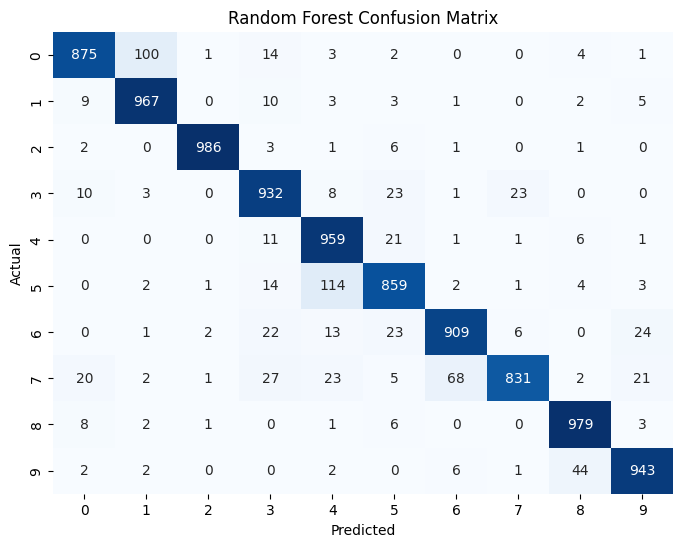

c:\Users\banup\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



----------NAIVE BAYES CLASSIFIER----------

Naive Bayes Accuracy: 0.6258
Random Forest Precision: 0.7454234197966514
Naive Bayes F1-score: 0.6248144529573578
Naive Bayes Recall: 0.6257999999999999
Naive Bayes ROC-AUC: 0.9109404222222223
Naive Bayes Confusion Matrix:
[[378 115   3 102 384   8   0   0  10   0]
 [ 22 598   1  83 260  24   0   0   2  10]
 [  5   0 987   0   1   6   0   0   1   0]
 [  4   1   4 576 359  21  22  13   0   0]
 [  1   0   6  17 910  17   5   0  34  10]
 [  7   0   1 129 378 468   0   5   5   7]
 [  2   1   8  35  45   0 874  18  14   3]
 [  2   2   1 285 228  13 353 110   3   3]
 [ 31   0   0   1 126  13   0   0 802  27]
 [  2   2   0   3 395   1   0   0  42 555]]


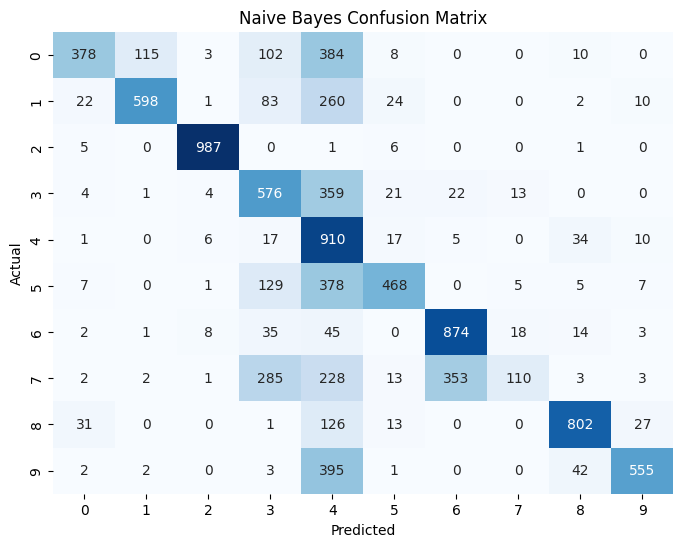

c:\Users\banup\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



----------K NEIGHBORS CLASSIFIER----------

KNN Accuracy: 0.9166
KNN Precision: 0.921741887468991
KNN F1-score: 0.9163591670502814
KNN Recall: 0.9166000000000001
KNN ROC-AUC: 0.9855020388888889
KNN Confusion Matrix:
[[845 139   0   8   2   0   0   1   1   4]
 [  9 981   0   5   2   0   0   0   1   2]
 [  3   2 990   2   1   0   1   0   0   1]
 [ 12  10   1 945  10   5   1  16   0   0]
 [  0   0   0   6 982   1   3   4   0   4]
 [  0   9   5  19 145 801   5   4   6   6]
 [  4   2   2   7  24   5 919  19   0  18]
 [ 11   4   0  24  24   0 104 825   0   8]
 [ 49   8   1   4   1   0   1   0 934   2]
 [  5  11   0   0   8   0   8   5  19 944]]


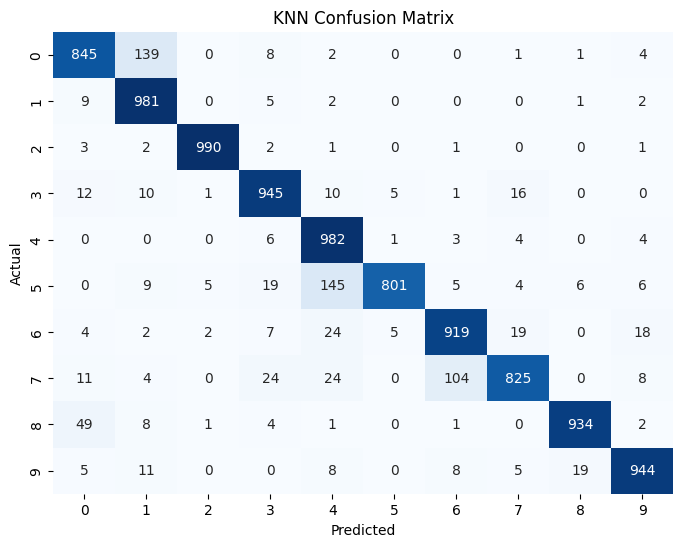

c:\Users\banup\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



----------SUPPORT VECTOR CLASSIFIER----------

SVC Accuracy: 0.9453
SVC F1-score: 0.9450524561187656
SVC Recall: 0.9452999999999999
SVC ROC-AUC: 0.9974962555555555
SVC_confusion_matrix :
[[878 101   0   7   2   0   0   1   8   3]
 [  8 972   0   9   2   1   0   0   3   5]
 [  2   0 993   1   1   1   0   0   1   1]
 [  4   5   4 940  11  13   2  21   0   0]
 [  1   0   0   4 979   6   3   2   3   2]
 [  0   0   1   4  70 919   1   3   2   0]
 [  1   0   0   8  12   5 951   6   0  17]
 [ 18   2   0  19  15   1  78 859   1   7]
 [  5   1   0   0   1   3   0   0 987   3]
 [  7   2   0   0   2   0   2   1  11 975]]


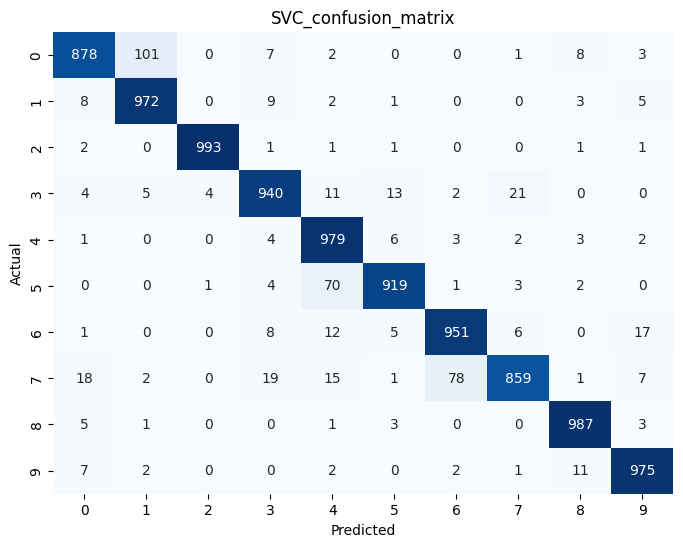

-------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                             COMPONENT SIZE=15                                                                     
-------------------------------------------------------------------------------------------------------------------------------------------------------------

----------DECISION TREE CLASSIFIER----------

Decision Tree Accuracy: 0.8049
Decision Tree Precision: 0.8045529409998975
Decision Tree F1-score: 0.8039461572051282
Decision Tree Recall: 0.8049000000000002
Decision Tree ROC-AUC: 0.8916111111111112
Decision Tree Confusion Matrix:
[[827  76   7  29   6   3   6  10  23  13]
 [ 32 922   4   8   8   8   3   2   7   6]
 [  6   3 933  12   9  21   2   7   2   5]
 [ 14   3   9 771  35  47  26  73   7  15]
 [  3   2   6  61 752  71   9  27  16  53]
 [  5   7  12  43 121 699   9  25  25  54

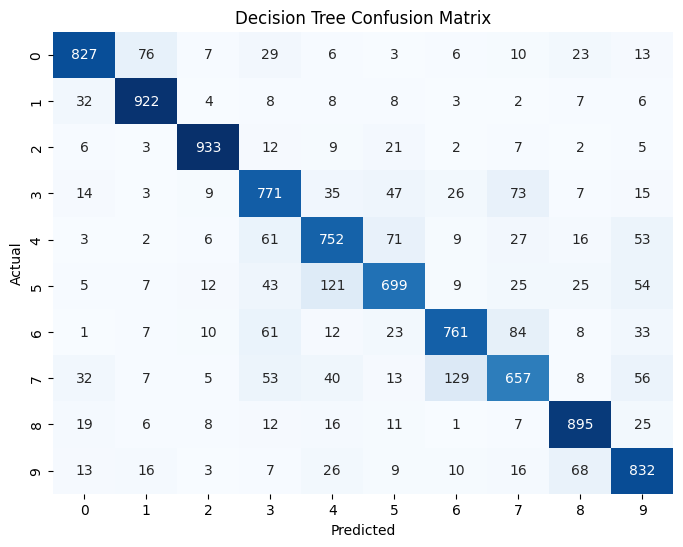

c:\Users\banup\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



----------RANDOM FOREST CLASSIFIER----------

Random Forest Accuracy: 0.9256
Random Forest Precision: 0.9275155210929695
Random Forest F1-score: 0.9253141964045171
Random Forest Recall: 0.9256
Random Forest ROC-AUC: 0.9948720888888889
Random Forest Confusion Matrix:
[[875  98   0  13   1   0   3   1   6   3]
 [  9 969   1   9   4   1   0   0   2   5]
 [  4   0 981   2   1  10   1   0   1   0]
 [  7   3   0 935  10  21   3  21   0   0]
 [  0   0   0  10 965  17   0   1   5   2]
 [  0   2   2  11 115 860   1   2   4   3]
 [  0   1   3  19  15  20 910   8   0  24]
 [ 21   3   1  24  27   3  68 836   1  16]
 [  7   1   0   0   2   7   0   0 981   2]
 [  2   1   0   0   1   0   4   2  46 944]]


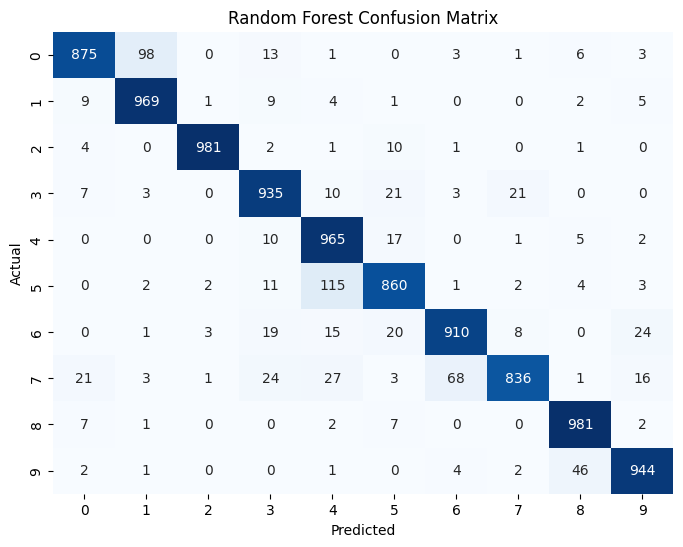

c:\Users\banup\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



----------NAIVE BAYES CLASSIFIER----------

Naive Bayes Accuracy: 0.6258
Random Forest Precision: 0.7454234197966514
Naive Bayes F1-score: 0.6248144529573578
Naive Bayes Recall: 0.6257999999999999
Naive Bayes ROC-AUC: 0.9109404222222223
Naive Bayes Confusion Matrix:
[[378 115   3 102 384   8   0   0  10   0]
 [ 22 598   1  83 260  24   0   0   2  10]
 [  5   0 987   0   1   6   0   0   1   0]
 [  4   1   4 576 359  21  22  13   0   0]
 [  1   0   6  17 910  17   5   0  34  10]
 [  7   0   1 129 378 468   0   5   5   7]
 [  2   1   8  35  45   0 874  18  14   3]
 [  2   2   1 285 228  13 353 110   3   3]
 [ 31   0   0   1 126  13   0   0 802  27]
 [  2   2   0   3 395   1   0   0  42 555]]


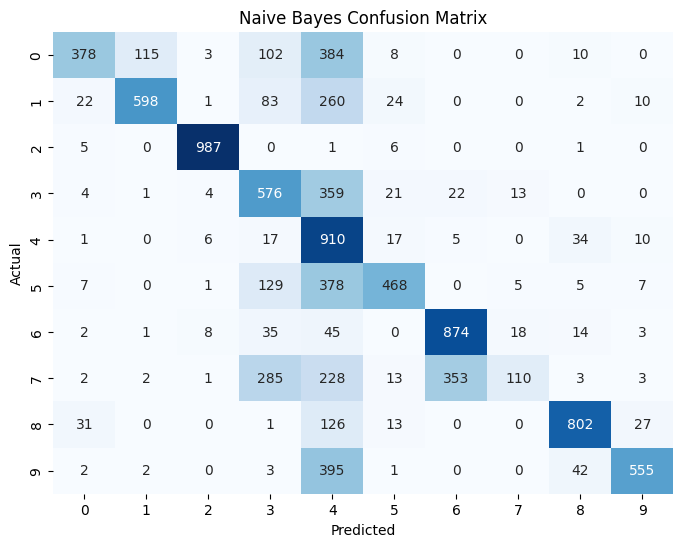

c:\Users\banup\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



----------K NEIGHBORS CLASSIFIER----------

KNN Accuracy: 0.9166
KNN Precision: 0.921741887468991
KNN F1-score: 0.9163591670502814
KNN Recall: 0.9166000000000001
KNN ROC-AUC: 0.9855020388888889
KNN Confusion Matrix:
[[845 139   0   8   2   0   0   1   1   4]
 [  9 981   0   5   2   0   0   0   1   2]
 [  3   2 990   2   1   0   1   0   0   1]
 [ 12  10   1 945  10   5   1  16   0   0]
 [  0   0   0   6 982   1   3   4   0   4]
 [  0   9   5  19 145 801   5   4   6   6]
 [  4   2   2   7  24   5 919  19   0  18]
 [ 11   4   0  24  24   0 104 825   0   8]
 [ 49   8   1   4   1   0   1   0 934   2]
 [  5  11   0   0   8   0   8   5  19 944]]


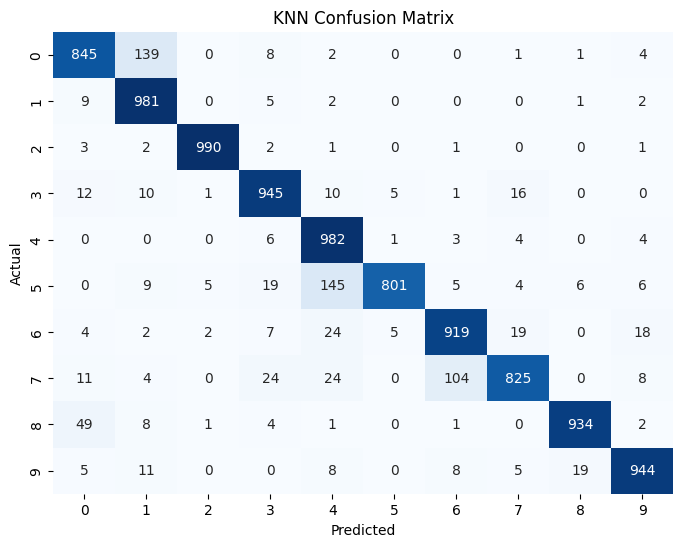

c:\Users\banup\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



----------SUPPORT VECTOR CLASSIFIER----------

SVC Accuracy: 0.9453
SVC F1-score: 0.9450524561187656
SVC Recall: 0.9452999999999999
SVC ROC-AUC: 0.9974839111111111
SVC_confusion_matrix :
[[878 101   0   7   2   0   0   1   8   3]
 [  8 972   0   9   2   1   0   0   3   5]
 [  2   0 993   1   1   1   0   0   1   1]
 [  4   5   4 940  11  13   2  21   0   0]
 [  1   0   0   4 979   6   3   2   3   2]
 [  0   0   1   4  70 919   1   3   2   0]
 [  1   0   0   8  12   5 951   6   0  17]
 [ 18   2   0  19  15   1  78 859   1   7]
 [  5   1   0   0   1   3   0   0 987   3]
 [  7   2   0   0   2   0   2   1  11 975]]


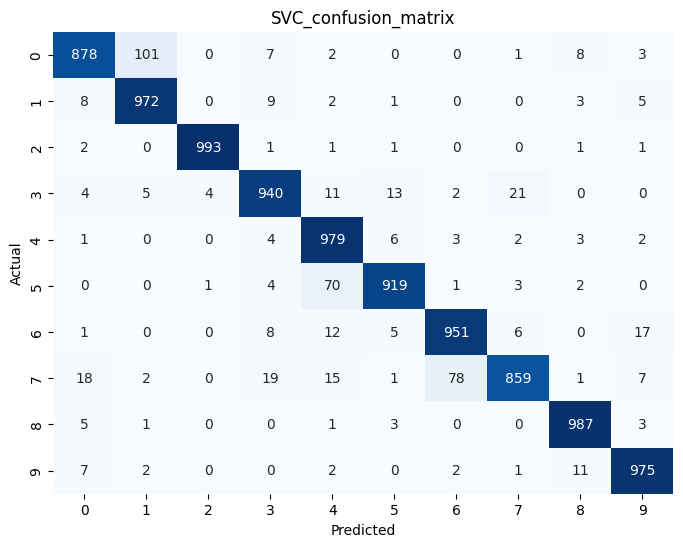

-------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                             COMPONENT SIZE=10                                                                     
-------------------------------------------------------------------------------------------------------------------------------------------------------------

----------DECISION TREE CLASSIFIER----------

Decision Tree Accuracy: 0.8031
Decision Tree Precision: 0.8025994085625336
Decision Tree F1-score: 0.8020666635864602
Decision Tree Recall: 0.8031
Decision Tree ROC-AUC: 0.8906111111111112
Decision Tree Confusion Matrix:
[[820  80   9  33   5   3   9   7  23  11]
 [ 37 911   7  10   8   8   4   1   6   8]
 [  5   3 932   5   9  27   5   7   2   5]
 [ 17   6  14 750  49  44  25  75   4  16]
 [  6   2   5  57 758  75   6  26  22  43]
 [  6  13  10  40 128 699   9  27  25  43]
 [  2   7 

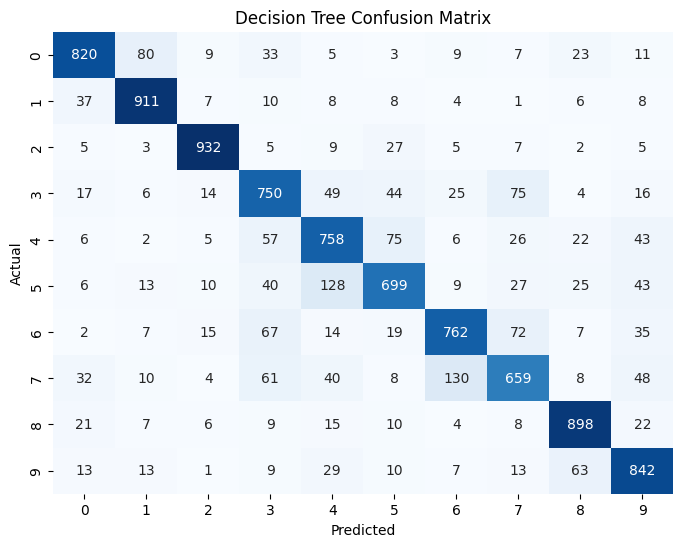

c:\Users\banup\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



----------RANDOM FOREST CLASSIFIER----------

Random Forest Accuracy: 0.9268
Random Forest Precision: 0.9286638749920453
Random Forest F1-score: 0.9265335052734679
Random Forest Recall: 0.9268000000000001
Random Forest ROC-AUC: 0.9950159833333334
Random Forest Confusion Matrix:
[[876  95   1  11   3   0   4   2   7   1]
 [  8 968   0  11   2   2   0   0   4   5]
 [  5   0 983   3   1   6   1   0   1   0]
 [ 10   4   0 933   7  22   2  22   0   0]
 [  1   0   0   8 963  19   2   0   6   1]
 [  0   2   1  16 110 864   2   2   2   1]
 [  1   1   3  22  12  20 916   6   0  19]
 [ 18   1   1  28  28   3  66 837   2  16]
 [  5   2   0   0   2   5   0   0 983   3]
 [  2   0   0   0   5   0   5   1  42 945]]


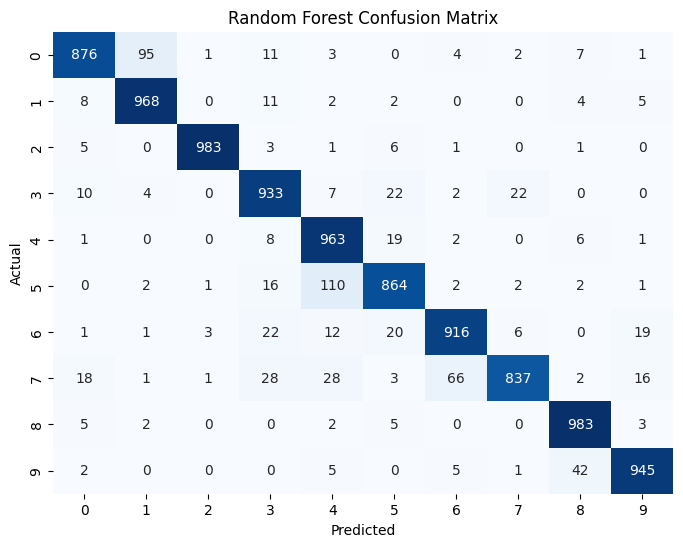

c:\Users\banup\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



----------NAIVE BAYES CLASSIFIER----------

Naive Bayes Accuracy: 0.6258
Random Forest Precision: 0.7454234197966514
Naive Bayes F1-score: 0.6248144529573578
Naive Bayes Recall: 0.6257999999999999
Naive Bayes ROC-AUC: 0.9109404222222223
Naive Bayes Confusion Matrix:
[[378 115   3 102 384   8   0   0  10   0]
 [ 22 598   1  83 260  24   0   0   2  10]
 [  5   0 987   0   1   6   0   0   1   0]
 [  4   1   4 576 359  21  22  13   0   0]
 [  1   0   6  17 910  17   5   0  34  10]
 [  7   0   1 129 378 468   0   5   5   7]
 [  2   1   8  35  45   0 874  18  14   3]
 [  2   2   1 285 228  13 353 110   3   3]
 [ 31   0   0   1 126  13   0   0 802  27]
 [  2   2   0   3 395   1   0   0  42 555]]


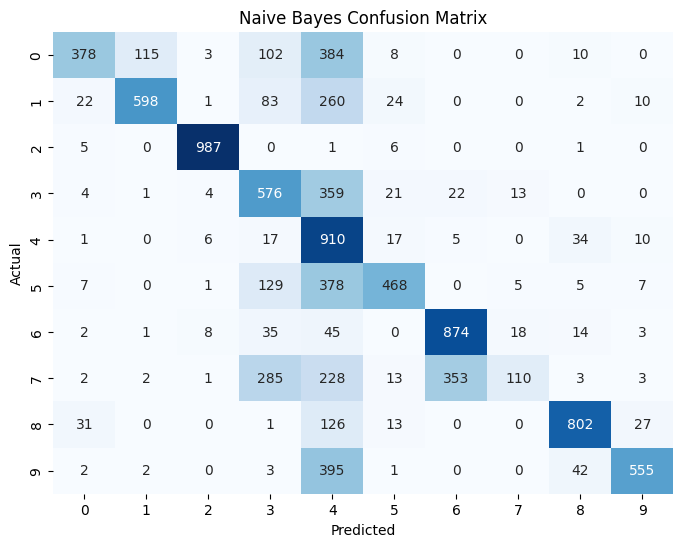

c:\Users\banup\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



----------K NEIGHBORS CLASSIFIER----------

KNN Accuracy: 0.9166
KNN Precision: 0.921741887468991
KNN F1-score: 0.9163591670502814
KNN Recall: 0.9166000000000001
KNN ROC-AUC: 0.9855020388888889
KNN Confusion Matrix:
[[845 139   0   8   2   0   0   1   1   4]
 [  9 981   0   5   2   0   0   0   1   2]
 [  3   2 990   2   1   0   1   0   0   1]
 [ 12  10   1 945  10   5   1  16   0   0]
 [  0   0   0   6 982   1   3   4   0   4]
 [  0   9   5  19 145 801   5   4   6   6]
 [  4   2   2   7  24   5 919  19   0  18]
 [ 11   4   0  24  24   0 104 825   0   8]
 [ 49   8   1   4   1   0   1   0 934   2]
 [  5  11   0   0   8   0   8   5  19 944]]


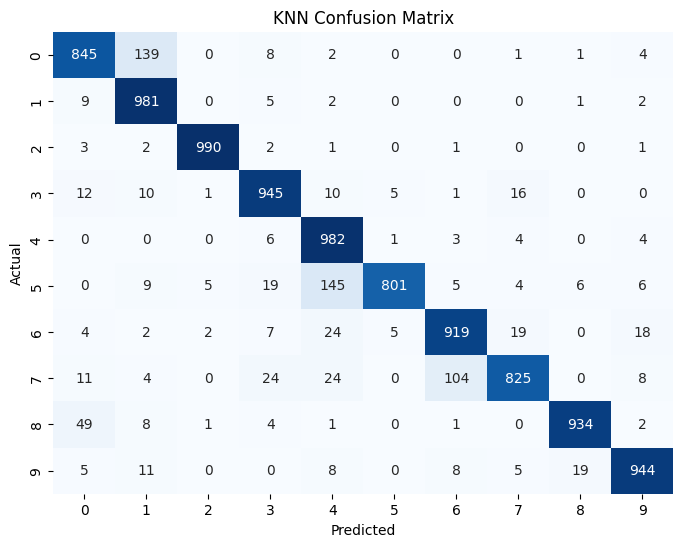

c:\Users\banup\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



----------SUPPORT VECTOR CLASSIFIER----------

SVC Accuracy: 0.9453
SVC F1-score: 0.9450524561187656
SVC Recall: 0.9452999999999999
SVC ROC-AUC: 0.9974924
SVC_confusion_matrix :
[[878 101   0   7   2   0   0   1   8   3]
 [  8 972   0   9   2   1   0   0   3   5]
 [  2   0 993   1   1   1   0   0   1   1]
 [  4   5   4 940  11  13   2  21   0   0]
 [  1   0   0   4 979   6   3   2   3   2]
 [  0   0   1   4  70 919   1   3   2   0]
 [  1   0   0   8  12   5 951   6   0  17]
 [ 18   2   0  19  15   1  78 859   1   7]
 [  5   1   0   0   1   3   0   0 987   3]
 [  7   2   0   0   2   0   2   1  11 975]]


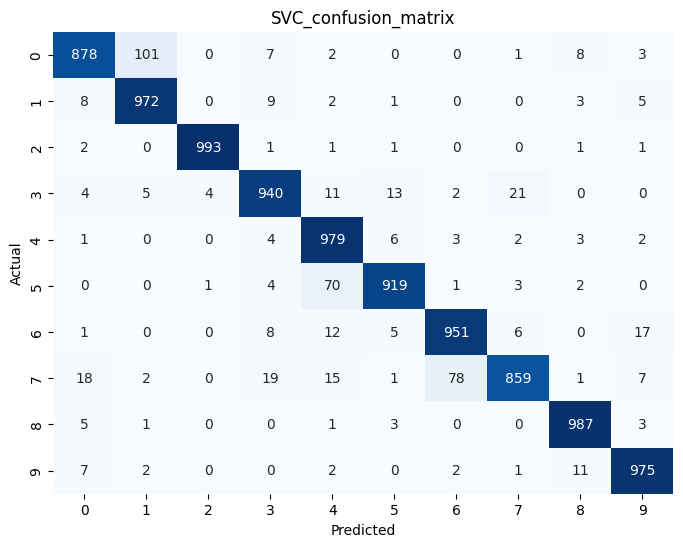

In [19]:
#Function of PCA
def pca(n_comp,X_train,X_test):
    #PCA model
    pca_model=PCA(n_components=n_comp)
    pca_model.fit(X_train)
    #---------------------------------
    #Standardisation 
    sc = MinMaxScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    return X_train,X_test

component_size=[30,25,20,15,10] #list of component size
for component in component_size:
      X_train,X_test=pca(int(component),X_train,X_test)

      #Function to fit model and Evaluate the model using evaluation metrics
      def evaluation_metrics(model, X_train, y_train, X_test, y_test):
            #Fitting with the model
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            
            #Evaluation metrics
            accuracy         =     accuracy_score(y_test, y_pred)
            recall           =     recall_score(y_test, y_pred,average='macro')
            precision        =     precision_score(y_test, y_pred,average='macro')
            f1               =     f1_score(y_test, y_pred,average='macro')
            conf_matrix      =     confusion_matrix(y_test,y_pred)
            roc_auc          =     roc_auc_score(y_test,model.predict_proba(X_test),multi_class='ovr')
           
            return accuracy,precision,f1,recall,conf_matrix, roc_auc
      
      print("-------------------------------------------------------------------------------------------------------------------------------------------------------------")
      print(f"                                                             COMPONENT SIZE={component}                                                                     ")
      print("-------------------------------------------------------------------------------------------------------------------------------------------------------------")

      #Decision Tree Classifier--------------------------------------------------------------------------------------------------------------------------------------

      dt_accuracy,dt_precision,dt_f1_score,dt_recall,dt_confusion_matrix,dt_roc_auc =  evaluation_metrics(DecisionTreeClassifier(), X_train, y_train, X_test, y_test)
      print()
      print("----------DECISION TREE CLASSIFIER----------")
      print()   
      print("Decision Tree Accuracy:", dt_accuracy),accuracy_list_dt.append(round(dt_accuracy,4))
      print("Decision Tree Precision:", dt_precision)
      print("Decision Tree F1-score:", dt_f1_score)
      print("Decision Tree Recall:", dt_recall)
      print("Decision Tree ROC-AUC:", dt_roc_auc),roc_auc_dt.append(dt_roc_auc)
      print("Decision Tree Confusion Matrix:")
      print(dt_confusion_matrix)
      #Confusion Matrix
      plt.figure(figsize=(8, 6))
      sns.heatmap(dt_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
      plt.title("Decision Tree Confusion Matrix")
      plt.xlabel("Predicted")
      plt.ylabel("Actual")
      plt.show()

      #Random Forest Classifier--------------------------------------------------------------------------------------------------------------------------------------

      rf_accuracy,rf_precision,rf_f1_score, rf_recall, rf_confusion_matrix,rf_roc_auc=evaluation_metrics(RandomForestClassifier(), X_train, y_train, X_test, y_test)
      print()
      print("----------RANDOM FOREST CLASSIFIER----------")
      print()  
      print("Random Forest Accuracy:", rf_accuracy),accuracy_list_rf.append(round(rf_accuracy,4))
      print("Random Forest Precision:", rf_precision)
      print("Random Forest F1-score:", rf_f1_score)
      print("Random Forest Recall:", rf_recall)
      print("Random Forest ROC-AUC:", rf_roc_auc),roc_auc_rf.append(rf_roc_auc)
      print("Random Forest Confusion Matrix:")
      print(rf_confusion_matrix)
      #Confusion Matrix
      plt.figure(figsize=(8, 6))
      sns.heatmap(rf_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
      plt.title("Random Forest Confusion Matrix")
      plt.xlabel("Predicted")
      plt.ylabel("Actual")
      plt.show()

      #Naive bayes Classifier--------------------------------------------------------------------------------------------------------------------------------------

      nb_accuracy,nb_precision,nb_f1_score, nb_recall,nb_confusion_matrix, nb_roc_auc =evaluation_metrics(GaussianNB(), X_train, y_train, X_test, y_test)
      print()
      print("----------NAIVE BAYES CLASSIFIER----------")
      print()  
      print("Naive Bayes Accuracy:", nb_accuracy),accuracy_list_nb.append(round(nb_accuracy,4))
      print("Random Forest Precision:", nb_precision)
      print("Naive Bayes F1-score:", nb_f1_score)
      print("Naive Bayes Recall:", nb_recall)
      print("Naive Bayes ROC-AUC:", nb_roc_auc),roc_auc_nb.append(nb_roc_auc)
      print("Naive Bayes Confusion Matrix:")
      print(nb_confusion_matrix)
      #Confusion Matrix
      plt.figure(figsize=(8, 6))
      sns.heatmap(nb_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
      plt.title("Naive Bayes Confusion Matrix")
      plt.xlabel("Predicted")
      plt.ylabel("Actual")
      plt.show()
      # #KNeighborsClassifier--------------------------------------------------------------------------------------------------------------------------------------

      knn_accuracy,knn_precision,knn_f1_score, knn_recall, knn_confusion_matrix ,knn_roc_auc =evaluation_metrics(KNeighborsClassifier(n_neighbors=8), X_train, y_train, X_test, y_test)
      print()
      print("----------K NEIGHBORS CLASSIFIER----------")
      print() 
      print("KNN Accuracy:", knn_accuracy),accuracy_list_knn.append(round(knn_accuracy,4))
      print("KNN Precision:", knn_precision)
      print("KNN F1-score:", knn_f1_score)
      print("KNN Recall:", knn_recall)
      print("KNN ROC-AUC:", knn_roc_auc),roc_auc_knn.append(knn_roc_auc)
      print("KNN Confusion Matrix:")
      print(knn_confusion_matrix)
      #Confusion Matrix
      plt.figure(figsize=(8, 6))
      sns.heatmap(knn_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
      plt.title("KNN Confusion Matrix")
      plt.xlabel("Predicted")
      plt.ylabel("Actual")
      plt.show()
      #Support Vector Classifier (SVC)--------------------------------------------------------------------------------------------------------------------------------------

      svc_accuracy,svc_precision,svc_f1_score, svc_recall, svc_confusion_matrix, svc_roc_auc=evaluation_metrics(SVC(kernel="rbf",C=1.0,probability=True), X_train, y_train, X_test, y_test)
      print()
      print("----------SUPPORT VECTOR CLASSIFIER----------")
      print() 
      print("SVC Accuracy:", svc_accuracy),accuracy_list_svc.append(round(svc_accuracy,4))
      print("SVC F1-score:", svc_f1_score)
      print("SVC Recall:", svc_recall)
      print("SVC ROC-AUC:", svc_roc_auc),roc_auc_svc.append(svc_roc_auc)
      print("SVC_confusion_matrix :")
      print(svc_confusion_matrix)
      #Confusion Matrix
      plt.figure(figsize=(8, 6))
      sns.heatmap(svc_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
      plt.title("SVC_confusion_matrix")
      plt.xlabel("Predicted")
      plt.ylabel("Actual")
      plt.show()

Accuracy Graph of Different Models

-------------------------------------------------------------ACCURACY GRAPH-------------------------------------------------------------
[0.8023, 0.8012, 0.8027, 0.8049, 0.8031]


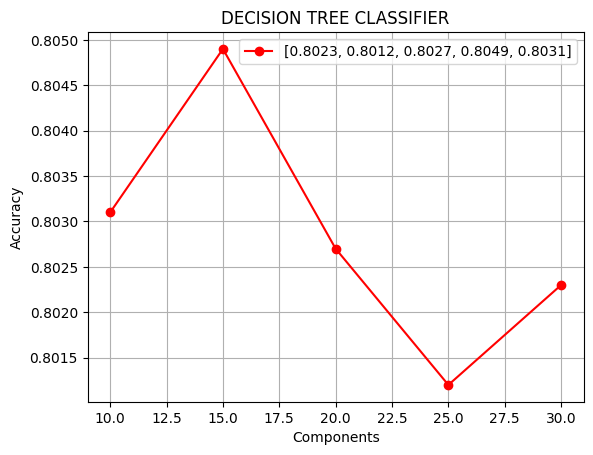

[0.9247, 0.9244, 0.924, 0.9256, 0.9268]


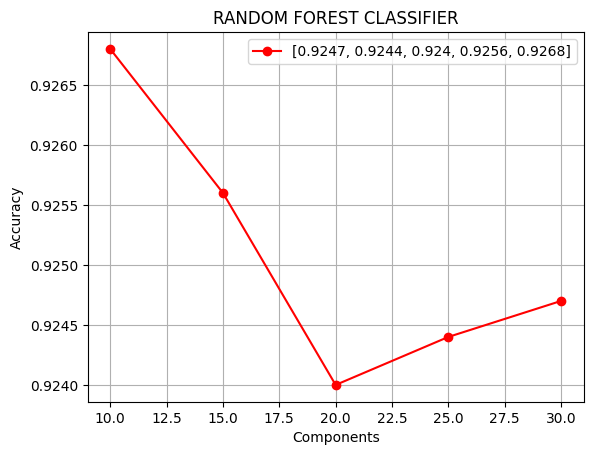

[0.6258, 0.6258, 0.6258, 0.6258, 0.6258]


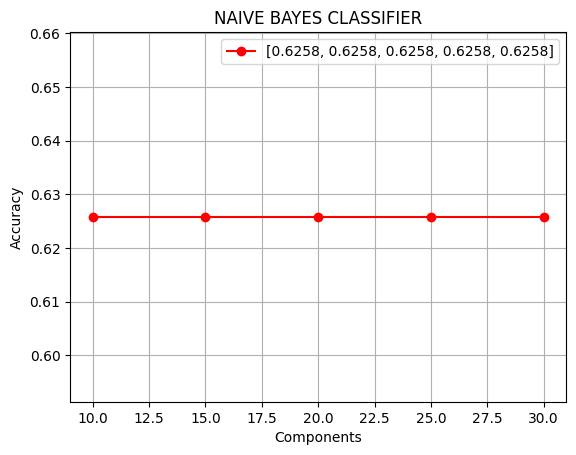

[0.9166, 0.9166, 0.9166, 0.9166, 0.9166]


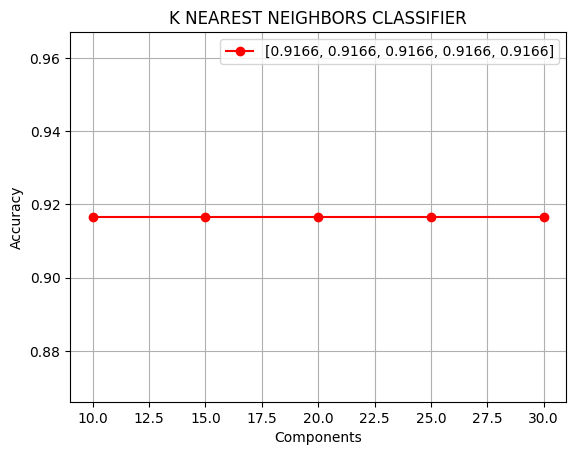

[0.9453, 0.9453, 0.9453, 0.9453, 0.9453]


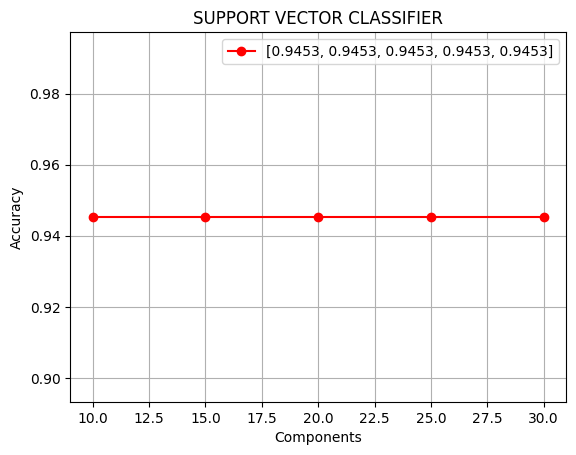

In [20]:
print("-------------------------------------------------------------ACCURACY GRAPH-------------------------------------------------------------")
model_list=["DECISION TREE CLASSIFIER","RANDOM FOREST CLASSIFIER","NAIVE BAYES CLASSIFIER","K NEAREST NEIGHBORS CLASSIFIER","SUPPORT VECTOR CLASSIFIER"]
for model in  model_list:
    accuracy=accuracy_list[model_list.index(model)]
    print(accuracy)
    plt.plot(component_size,accuracy,label=accuracy,color='red', marker='o')
    plt.title(model)
    plt.xlabel("Components")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

Plotting ROC_AUC Graph

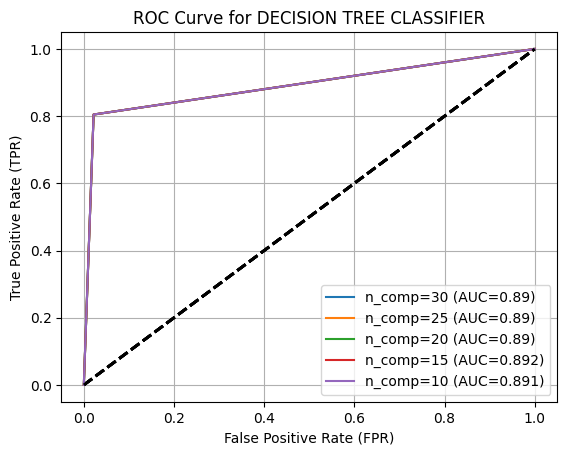

c:\Users\banup\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


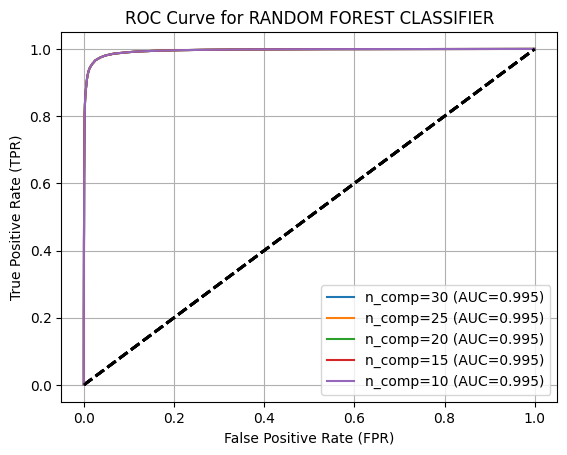

c:\Users\banup\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


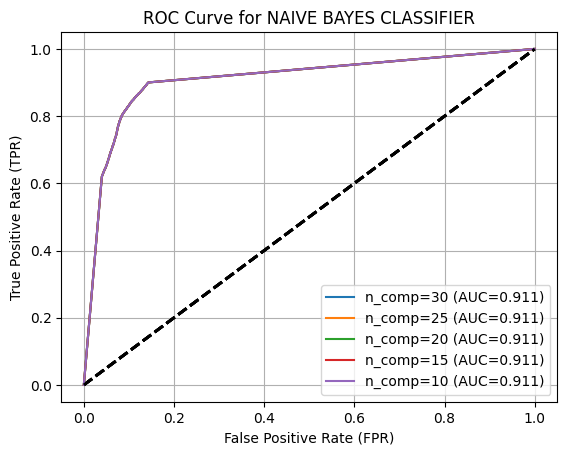

c:\Users\banup\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


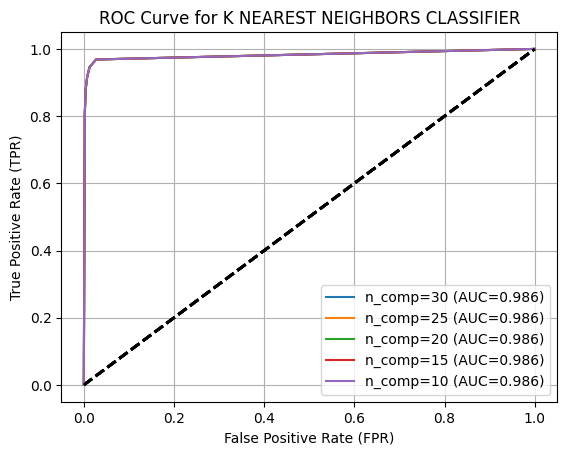

c:\Users\banup\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


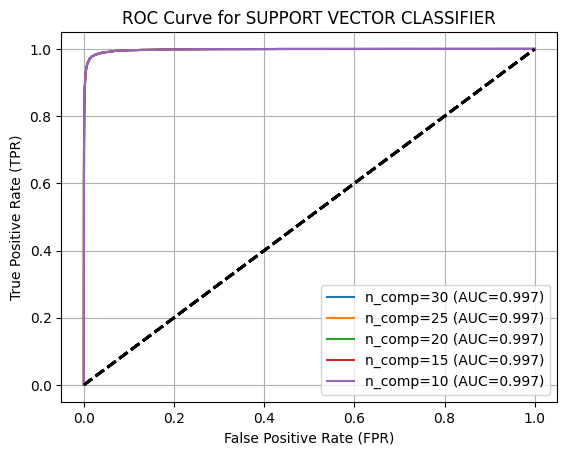

In [21]:
#ROC Curve for different Models with different Component size

model_list=[DecisionTreeClassifier(random_state=42),RandomForestClassifier(random_state=42),GaussianNB(),KNeighborsClassifier(),SVC(probability=True)]
model_name_list=["DECISION TREE CLASSIFIER","RANDOM FOREST CLASSIFIER","NAIVE BAYES CLASSIFIER","K NEAREST NEIGHBORS CLASSIFIER","SUPPORT VECTOR CLASSIFIER"]
m_index=0 
for model in model_list:    
     y_test_binary = label_binarize(y_test, classes=range(10))
     fpr, tpr,threshold = roc_curve(y_test_binary.ravel(), prediction_probability(model).ravel())
     auc_value= auc(fpr,tpr)
     ra_index=0 
     for component in component_size: 
                plt.plot(  fpr,tpr,label="n_comp={} (AUC={})".format((component),(round(roc_auc_list[m_index][ra_index],3)))   )
                plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
                ra_index+=1
     plt.xlabel('False Positive Rate (FPR)')
     plt.ylabel('True Positive Rate (TPR)')
     plt.title(f'ROC Curve for {model_name_list[m_index]}')
     plt.legend()
     plt.grid(True)
     plt.show()
     m_index+=1